In [2]:
from IPython.display import Image, display, HTML

import pandas as pd

In [3]:
# style
IMAGE_WIDTH = 800

def highlight_below_threshold(s, threshold):
    if pd.api.types.is_numeric_dtype(s):
        return ['background-color: yellow' if v < threshold else '' for v in s]
    return ['' for _ in s]  # return an empty list for non-numeric columns

def format_number(x):
    if isinstance(x, float):
        return '{:.2f}'.format(x)
    elif isinstance(x, int):
        return '{:.0f}'.format(x)
    else:
        return x
    
def print_warning(warning):
    display(HTML(f'<p style="color:red">{warning}</p>'))

In [28]:
# input parameters
statistics_h5 = None
cbc_umi_png = None
r2_length_png = None
mean_r2_quality_histogram_png = None
quality_per_position_png = None
pass_trim_rate_threshold = None
read_length_threshold = None
fraction_below_read_length_threshold = None
percent_aligned_threshold = None

In [5]:
files = [statistics_h5, cbc_umi_png, r2_length_png, mean_r2_quality_histogram_png, quality_per_position_png]
for file in files:
    if file is None:
        raise ValueError(f"Missing required input file: {file}.\n Given files are: {files}")

thresholds = [pass_trim_rate_threshold, read_length_threshold, fraction_below_read_length_threshold, percent_aligned_threshold]
for threshold in thresholds:
    if threshold is None:
        raise ValueError(f"Missing required input threshold: {threshold}.\n Given thresholds are: {thresholds}")

# Main statistics

In [13]:
df_stats_shortlist = pd.read_hdf(statistics_h5, key="statistics_shortlist")
display(df_stats_shortlist.style.format(format_number))
print("\n\n\n\n")

,value
statistic,
num_input_reads,975231343.00
num_trimmed_reads,773729431.00
pass_trimmer_rate,0.79
mean_umi_per_cell,0.00
mean_read_length,146.00
%q20,86.79
%q30,67.69
prc_aligned_to_genome,5.21
prc_aligned_to_genes_unstranded,3.35


### Trimmer output statistics

In [24]:
df_trimmer_failure_codes = pd.read_hdf(statistics_h5, key="trimmer_failure_codes")
df_trimmer_stats = df_trimmer_failure_codes.groupby(level="segment").agg({"failed read count": "sum", "total read count": "first", "% failure": "sum"})
display(df_trimmer_stats.style.format(format_number))
if df_trimmer_stats.loc["total", "% failure"] > pass_trim_rate_threshold:
    print_warning(f"Total failure rate is above threshold ({pass_trim_rate_threshold}%): {df_trimmer_stats.loc['total', '% failure']:.2f}%")
print("\n\n\n\n")

,failed read count,total read count,% failure
segment,,,
CBC,22930809,975231343,2.35
Illumina R1 adapter,306506,975231343,0.03
UMI first 9bp,1338,975231343,0.00
UMI last 3bp,1124,975231343,0.00
insert,531025,975231343,0.05
low quality bases,52442,975231343,0.01
polyT,9444963,975231343,0.97
start,168233705,975231343,17.25
total,201501912,975231343,20.66


### Trimmer failure codes

In [25]:
df_trimmer_failure_codes = pd.read_hdf(statistics_h5, key="trimmer_failure_codes")
display(df_trimmer_failure_codes.style.format(format_number))
print("\n\n\n\n")

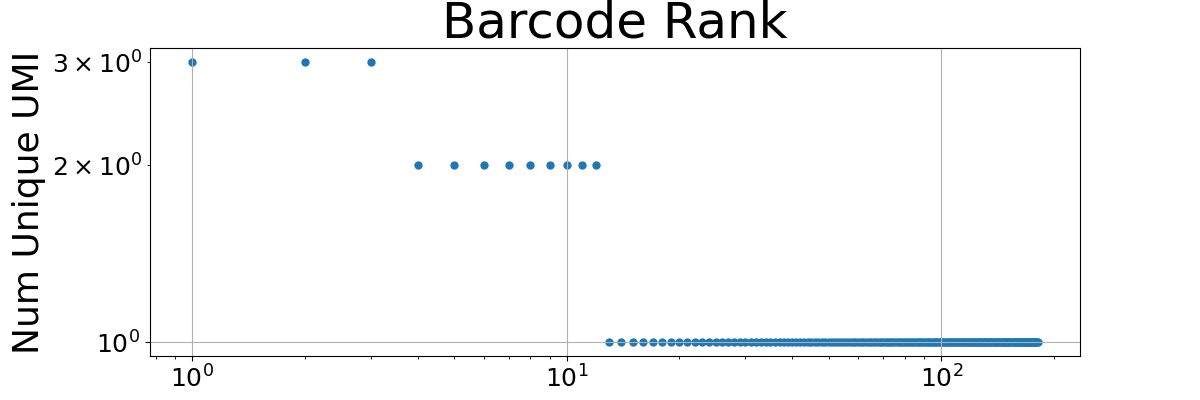

Plot of UMI counts per cell barcode. x-axis is the cell barcodes, ordered by UMI count.  y-axis is the UMI count







In [47]:
display(Image(cbc_umi_png, width=IMAGE_WIDTH))
caption = "Plot of UMI counts per cell barcode. x-axis is the cell barcodes, ordered by UMI count.  y-axis is the UMI count."
print(caption)
print("\n\n\n\n")

## Read 2 sequence statistics

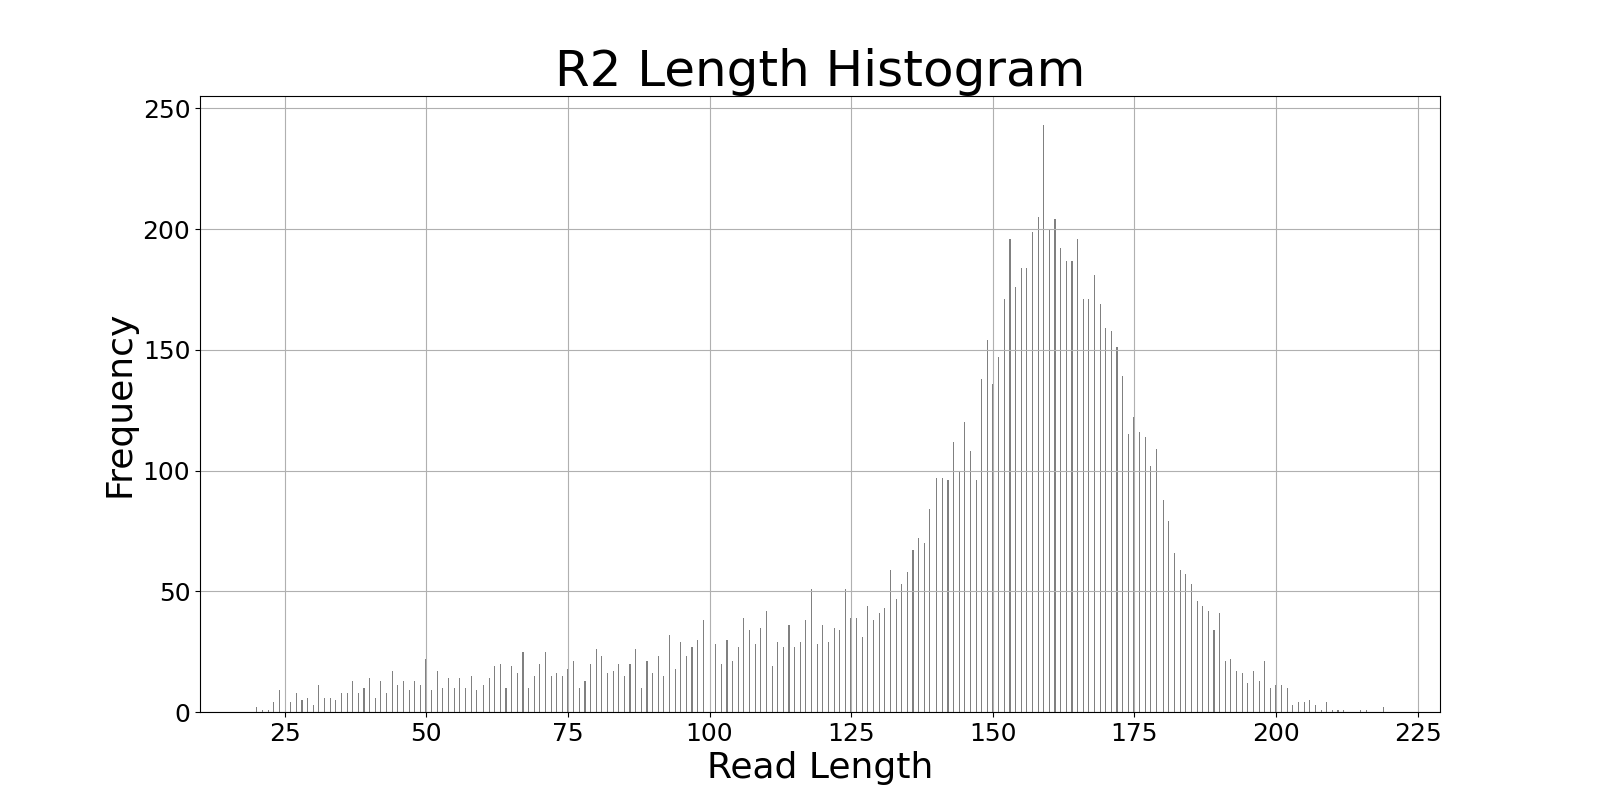

Histogram of Read2 lengths
Fraction of reads below read length: 39.86%
Read length threshold: 150







In [29]:
display(Image(r2_length_png, width=IMAGE_WIDTH))
caption = "Histogram of Read2 lengths"
print(caption)

r2_lengths = pd.read_hdf(statistics_h5, key="r2_lengths")
below_read_length_threshold = r2_lengths[r2_lengths < read_length_threshold]
fraction_below_read_length = below_read_length_threshold.count() / r2_lengths.count() * 100


if fraction_below_read_length > fraction_below_read_length_threshold:
    print_warning(f"Fraction of reads below read length is above threshold ({fraction_below_read_length_threshold}%): {fraction_below_read_length:.2f}%")
else:
    print(f"Fraction of reads below read length: {fraction_below_read_length:.2f}%")
print(f"Read length threshold: {read_length_threshold}")
print("\n\n\n\n")

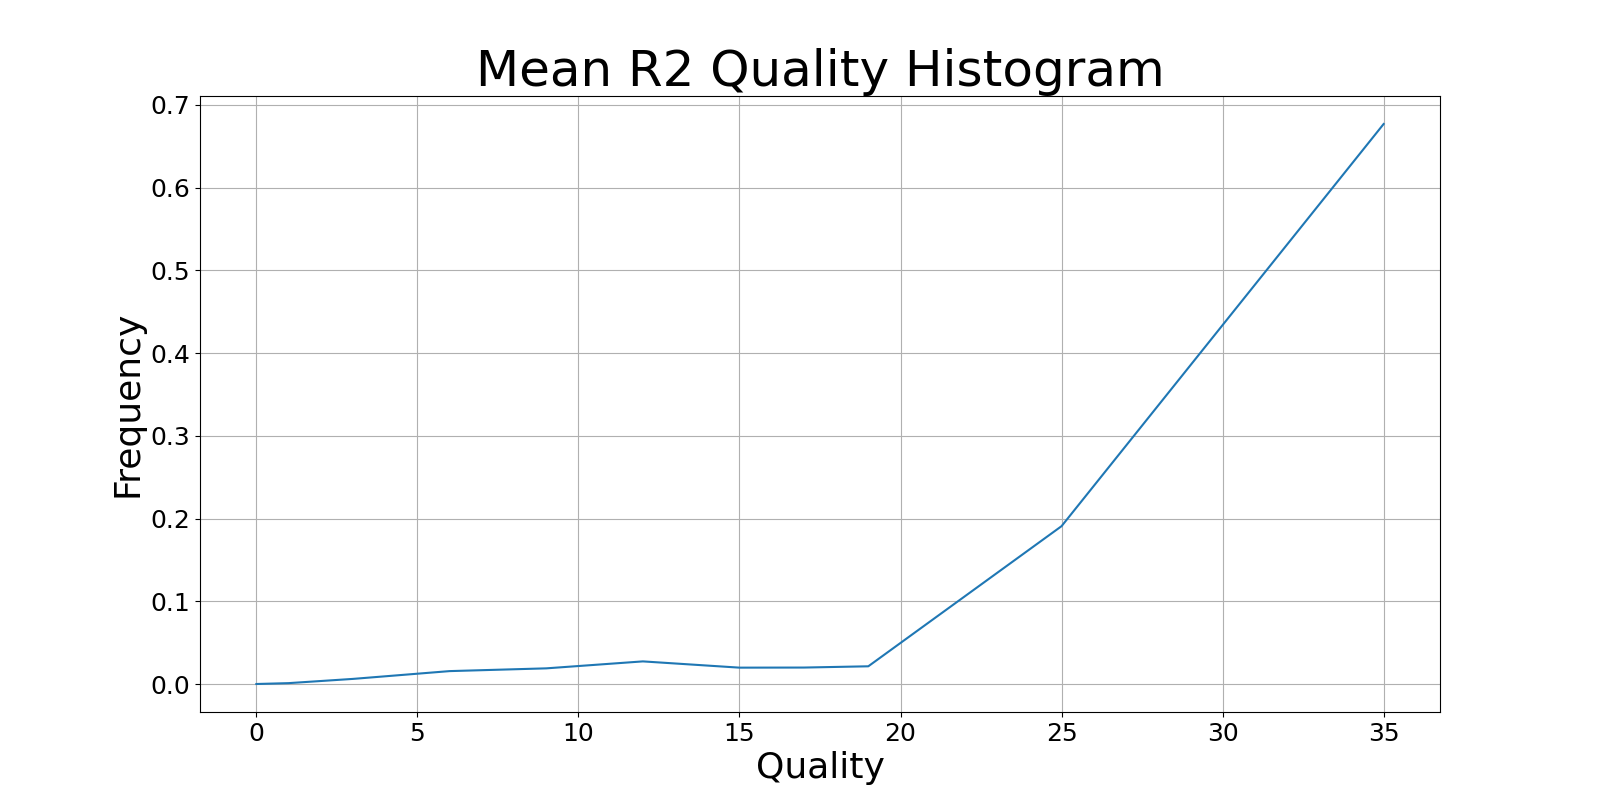

Histogram of mean quality scores for Read2







In [9]:
display(Image(mean_r2_quality_histogram_png, width=IMAGE_WIDTH))
caption = "Histogram of mean quality scores for Read2"
print(caption)
print("\n\n\n\n")

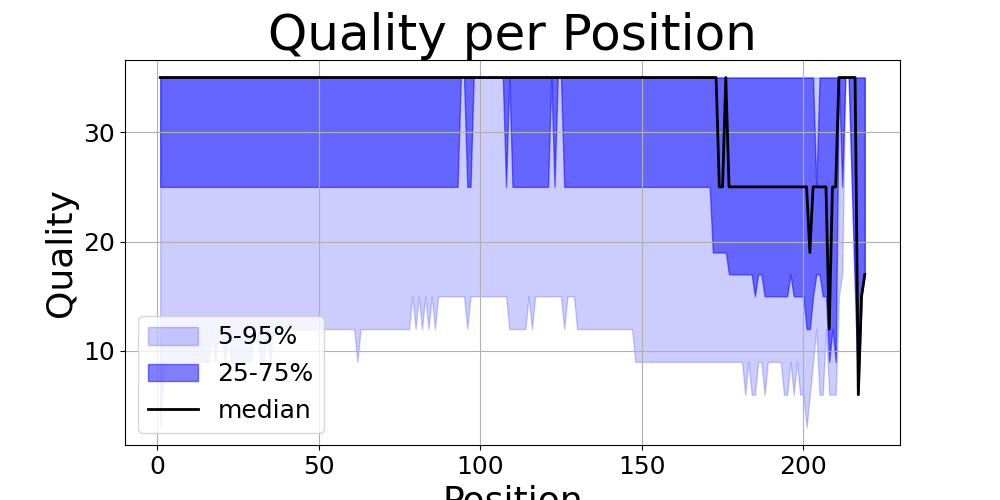

Quality per position for Read2







In [10]:
display(Image(quality_per_position_png, width=IMAGE_WIDTH))
caption = "Quality per position for Read2"
print(caption)
print("\n\n\n\n")

## STAR statistics

In [15]:
df_trimmer_stats = pd.read_hdf(statistics_h5, key="star_stats")
display(df_trimmer_stats.style.format(format_number))
percent_aligned = pd.read_hdf(statistics_h5, key="statistics_shortlist").loc["prc_aligned_to_genome", "value"]
if percent_aligned < percent_aligned_threshold:
    print_warning(f"Percent aligned to genome is below threshold ({percent_aligned_threshold}%): {percent_aligned:.2f}%")
else:
    print(f"Percent aligned to genome: {percent_aligned:.2f}%")
print("\n\n\n\n")

,metric,value,read_type,value_type
0,Started_job_on,Apr 03 12:38:41,general,datetime
1,Started_mapping_on,Apr 03 12:38:48,general,datetime
2,Finished_on,Apr 03 12:38:52,general,datetime
3,Mapping_speed_Million_of_reads_per_hour,8.69,general,number
4,Number_of_input_reads,9652,general,number
5,Average_input_read_length,145,general,number
7,Uniquely_mapped_reads_number,416,unique_reads,number
8,Uniquely_mapped_reads_%,4.31,unique_reads,percentage
9,Average_mapped_length,122.06,unique_reads,number
10,Number_of_splices_Total,95,unique_reads,number


Percent aligned to genome: 5.21%





